# Dealing with Class Imbalanced Classifications

- Resampling techniques
- Plausable fictitious data: Synthetic Minority Oversampling (SMOTE), Adaptive Synthetic Oversampling (ADASYN)

## Synthetic Minority Oversampling (SMOTE)

In [3]:
!pip install scikit-learn-intelex

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report as CR
import warnings
warnings.simplefilter(action='ignore')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [4]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


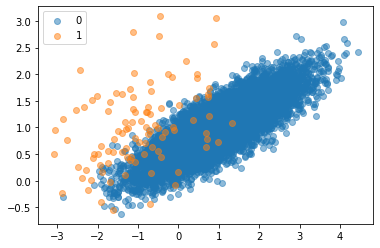

In [5]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label),alpha=0.5)
plt.legend()
plt.show()

Counter({0: 9900, 1: 9900})


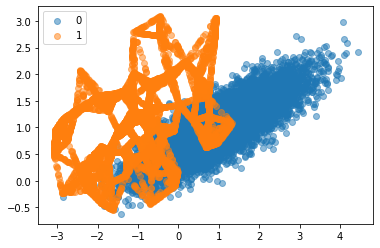

In [6]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(ys)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(ys == label)[0]
	plt.scatter(Xs[row_ix, 0], Xs[row_ix, 1], label=str(label),alpha=0.5)
plt.legend()
plt.show()

## Adaptive Synthetic Oversampling

In [7]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Counter({0: 9900, 1: 9899})


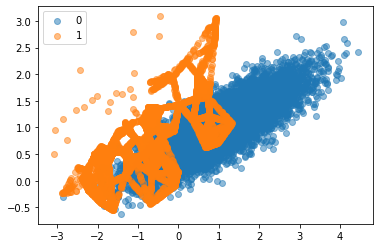

In [8]:
ada = ADASYN(random_state=42)
Xas, yas = ada.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(yas)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(yas == label)[0]
	plt.scatter(Xas[row_ix, 0], Xas[row_ix, 1], label=str(label), alpha=0.5)
plt.legend()
plt.show()

## Real Data Application: Porto Seguro Safe Driver Detection

In [9]:
data = pd.read_csv('Data/safe_driver_prediction.csv')

In [10]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [11]:
# this is a hard class imbalanced problem
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [12]:
x = data.loc[:,'ps_ind_01':'ps_calc_20_bin'].values
y = data.target.values

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler
ss = StandardScaler()
rs = RobustScaler()

xs = ss.fit_transform(x)
xrs = rs.fit_transform(x)

model = LogisticRegression(solver='lbfgs',max_iter=10000)

In [14]:
model.fit(xs,y)
print(CR(y,model.predict(xs)))
# Recall means what % of that class was correctly identified

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    573518
           1       0.00      0.00      0.00     21694

    accuracy                           0.96    595212
   macro avg       0.48      0.50      0.49    595212
weighted avg       0.93      0.96      0.95    595212



In [15]:
#model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#model.fit(xs,y)
#print(CR(y,model.predict(xs)))

In [16]:
ada = ADASYN(random_state=123)
xs, ys = ada.fit_resample(x, y)

KeyboardInterrupt: 

In [ ]:
model.fit(xs,ys)
print(CR(y,model.predict(x)))